In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from mpl_toolkits import mplot3d

### Lendo a imagem

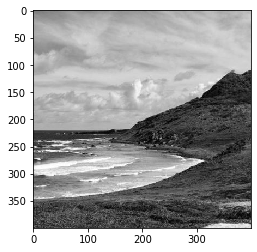

In [166]:
imagem = cv2.imread('paisagem.jpg', 0)
plt.imshow(imagem, 'gray'); 
plt.show()

In [23]:
meio = imagem.shape[0], imagem.shape[1]
meio

(400, 400)

In [126]:
2//2

1

In [129]:
def rotate(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    altura = image.shape[0]
    largura = image.shape[1]
    
    x_center = int(largura/2)
    y_center = int(altura/2)
    
   
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((x_center, y_center), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((altura * sin) + (largura * cos))
    nH = int((altura * cos) + (largura * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - x_center
    M[1, 2] += (nH / 2) - y_center
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

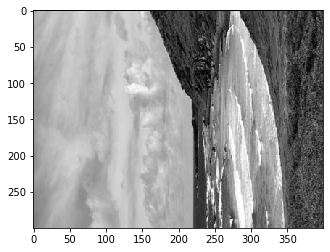

In [132]:
new_i = imagem[:,:-100]
neew = rotate(new_i, 90)
plt.imshow(rotate(neew, 0), 'gray');

### Pegar a matriz de energia

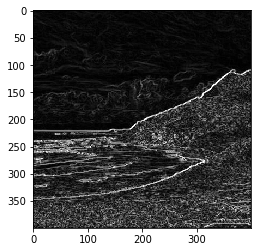

In [3]:
def get_mat_energy(im):
    
    ddepth = cv2.CV_32F
    x = cv2.Sobel(im, ddepth, 1, 0)
    y = cv2.Sobel(im, ddepth, 0, 1)
    x_abs = cv2.convertScaleAbs(x)
    y_abs = cv2.convertScaleAbs(y)
    mat_energy = cv2.addWeighted(x_abs, 0.5, y_abs, 0.5, 0)
    
    return mat_energy

plt.imshow(get_mat_energy(imagem), 'gray');

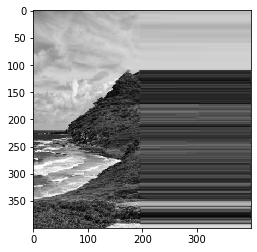

In [8]:
plt.imshow(imagem, 'gray');

In [125]:
imagem.shape

(400, 400)

In [126]:
imagem = imagem[:,0:200]

In [7]:
seam_dimimuir(imagem)

array([[123, 123, 123, ..., 187, 187, 187],
       [125, 124, 124, ..., 187, 187, 187],
       [127, 126, 126, ..., 186, 186, 186],
       ...,
       [ 55,  37,  78, ..., 219, 220, 220],
       [ 63,  70,  66, ..., 225, 215, 215],
       [102,  57,  48, ..., 229, 218, 218]], dtype=uint8)

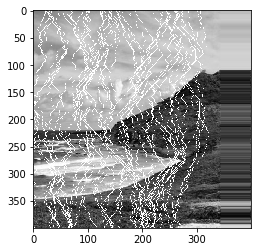

In [162]:
teste = seam_dimimuir(imagem, 50)

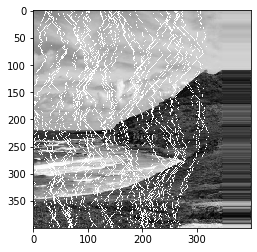

In [176]:
teste_add = seam_dimimuir(imagem, 50)

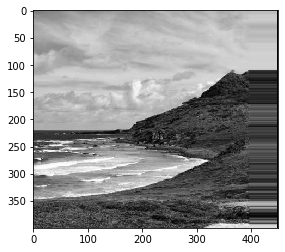

In [177]:
plt.imshow(teste_add, 'gray');

(400, 450)


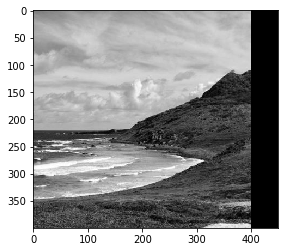

In [159]:
altura = imagem.shape[0]
largura = imagem.shape[1]

new = np.zeros((altura, largura+50))
new[:altura , :largura] = imagem.copy()
plt.imshow(new, 'gray');
print(new.shape)

In [175]:
def seam_dimimuir(img, num_iteracoes):
    show = img.copy()
    
    altura = img.shape[0]
    largura = img.shape[1]
    
    new = np.zeros((altura, largura+num_iteracoes))
    new[:altura , :largura] = img.copy()
    
    new_largura = img.shape[1]

#     num_iteracoes = int(img.shape[1]/2)
        
    for s in range(num_iteracoes):
        altura = img.shape[0]
        largura = img.shape[1]
        new_largura +=1
        mat_energy = get_mat_energy(img).astype('uint16')

        seam = np.zeros(img.shape).astype('uint16')

        seam = mat_energy

        for i in range(1, altura, 1):
            for j in range(0, largura, 1):
                if(j == 0):
                    seam[i,j] += np.min((seam[i-1, j], seam[i-1, j+1]))
                elif(j == largura-1):
                    seam[i,j] += np.min((seam[i-1, j-1], seam[i-1, j]))
                else:
                    seam[i,j] += np.min((seam[i-1, j-1], seam[i-1, j], seam[i-1, j+1]))

        indice_menor = np.argmin(seam[altura-1, :])

        for i in range(altura-1, -1, -1):
            show[i, indice_menor] = 255
            img[i, indice_menor:largura-2] = img[i, indice_menor+1:largura-1]
            new[i, indice_menor+1:new_largura-1] = new[i, indice_menor:new_largura-2]
            
            if indice_menor == 0:
                indice_menor = np.argmin((seam[i-1, indice_menor], seam[i-1, indice_menor+1]))
            elif indice_menor == largura-1:
                indice_menor = (indice_menor-1) + np.argmin((seam[i-1, indice_menor-1], seam[i-1, indice_menor]))
            else:
                indice_menor = (indice_menor-1) + np.argmin((seam[i-1, indice_menor-1], seam[i-1, indice_menor], seam[i-1, indice_menor+1]))

        img = img[:, :-1]
#         new = new[:, :-1]
    
        
    plt.imshow(show, 'gray')
    return new


In [15]:
def seam_carving_diminuir_largura(x):
#     if cv2.getTrackbarPos('diminuir em metade largura','image') == 1:
#         new = seam_dimimuir(imagem)
        
#         cv2.imshow('image', new)
    
    return 

In [16]:
imagem = cv2.imread('paisagem.jpg', 0)

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
# cv2.createTrackbar('altura','image', 1, 2, seam_carving_altura)
# cv2.createTrackbar('diminuir em metade altura','image', 0, 1, seam_carving_diminuir_altura)
cv2.createTrackbar('diminuir em metade largura','image', 0, 1, seam_carving_diminuir_largura)
cv2.imshow('image',imagem)

while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()

NameError: name 'image' is not defined

In [112]:
cv2.destroyAllWindows()